In [1]:
2+2


4

In [1]:
#import modules: pandas, numpy, matplotlib.pyplot, sklearn.cluster -> KMeans and, sklearn.preprocessing -> StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler as stds
import seaborn as sns

In [2]:
#Make a dataframe
data= pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
#Check statistcs of the data
data.describe()
print(data.columns.values)


['Channel' 'Region' 'Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper'
 'Delicassen']


In [4]:
#Standerize the data if needed
scaler=stds()
scaled_data=scaler.fit_transform(data)
newdata=pd.DataFrame(scaled_data)
newdata.head().describe()


,0,1,2,3,4,5,6,7
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.020862,0.590668,0.030991,0.160029,-0.074257,-0.027207,-0.110887,0.731772
std,0.956567,0.000000,0.516473,0.500390,0.202885,0.484236,0.258849,1.008003
min,-0.690297,0.590668,-0.447029,-0.624020,-0.392977,-0.589367,-0.498588,-0.066339
25%,1.448652,0.590668,-0.391302,-0.052396,-0.079356,-0.270136,-0.231918,0.089151
50%,1.448652,0.590668,0.052933,0.408538,-0.041115,-0.137536,-0.043569,0.093411
75%,1.448652,0.590668,0.100111,0.523568,-0.028157,0.173859,0.086407,1.299347
max,1.448652,0.590668,0.840239,0.544458,0.170318,0.687144,0.133232,2.243293


In [5]:
#apply kmeans with init='k-means++' and any number of clusters and then check its inertia
kmeans = KMeans(n_clusters=2,init='k-means++')
kmeans.fit(newdata)
kmeans.inertia_

2599.3855593561393

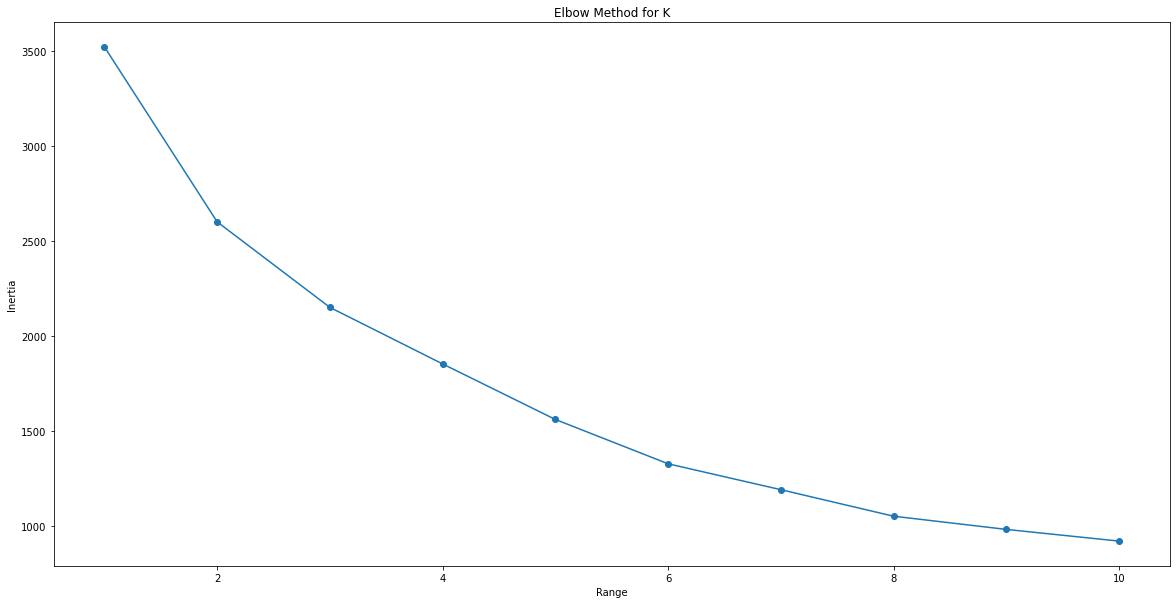

In [6]:
#Apply kmeans with n number of clusters and append the inertia in a list for the plotting of elbow method in order to find out the appropriate number of k
inert=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300)
    kmeans.fit(newdata)
    inert.append(kmeans.inertia_)
plt.figure(figsize=(20,10))
plt.plot(range(1,11),inert,marker='o')
plt.xlabel("Range")
plt.ylabel("Inertia")
plt.title("Elbow Method for K")
#plt.legend()
plt.show()


<AxesSubplot:>

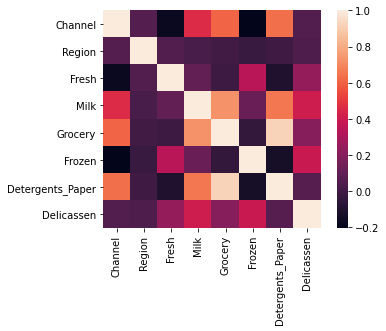

In [7]:
#apply kmeans with the elbow number of clusters
kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(newdata)
kmeans.inertia_
cor = data.corr()
sns.heatmap(cor,square=True)

In [11]:
pred = kmeans.predict(newdata)
print(pred)
frame=pd.DataFrame(pred)
frame['Cluster']=pred
print(frame.groupby('Cluster').size())
data['Cluster']=pred
data.head()


[1 1 1 4 1 1 1 1 4 1 1 1 1 1 1 4 1 4 1 4 1 4 4 3 1 1 4 4 1 4 4 4 4 4 4 1 4
 1 1 4 4 4 1 1 1 1 1 3 1 1 4 4 1 1 4 4 3 1 4 4 1 3 1 1 4 3 4 1 4 4 4 4 4 1
 1 4 4 1 4 4 4 1 1 4 1 3 3 4 4 4 4 4 3 4 1 4 1 4 4 4 1 1 1 4 4 4 1 1 1 1 4
 1 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4
 4 4 4 4 4 4 4 1 1 4 1 1 1 4 4 1 1 1 1 4 4 4 1 1 4 1 4 1 4 4 4 4 4 3 4 2 4
 4 4 4 1 1 4 4 4 1 4 4 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 3 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 4 4 4 4 4 4 1 4 1 4 4 4 4 4 4 4 4 4 4 4 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 3 0 1 0 0 0 0 1 1 4 1 4 4 1 1 4 1 4 1 4 1 4 4 4 1 4 4 4 4 4 4 4 1 4 4 4 4
 4 4 4 1 4 4 1 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4
 1 1 4 4 4 4 4 4 1 1 4 1 4 4 1 4 1 1 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4]
Cluster
0     92
1    125
2      1
3     12
4    210
dtype: int64


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,4
4,2,3,22615,5410,7198,3915,1777,5185,1
